# Phase 2 [EDL - Data analysis phase ]

In [1]:
# 1.Open new Jupyter notebook

In [1]:
# 2.Import required libraries

import csv
import numpy as np
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
# 3.Read your cleaned csv which you did in phase 1

video_games = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
df = pd.DataFrame(video_games)

df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 4.Shape the data

df.shape

(16719, 16)

In [5]:
# 5.Show first five records

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 6.Show all columns of the dataframe

df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [7]:
# 7.Show last 5 five rows

# rows = df.iloc[-2:]
# print(rows)

df.tail(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16709,15 Days,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.0,0.01,63.0,6.0,5.8,8.0,DTP Entertainment,NaN
16710,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,Atari,T
16711,Aiyoku no Eustia,PSV,2014.0,Misc,dramatic create,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16712,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16713,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 8.Describe the data.

df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


<AxesSubplot:xlabel='Year_of_Release'>

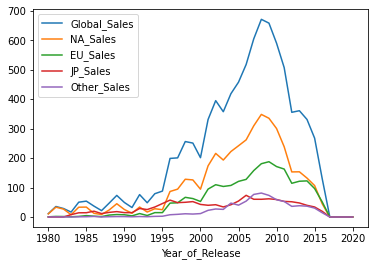

In [12]:
# 9.Group the sales data of each region on Year_of_Release and plot the same 
# (It should show which region sales was at peak on which year of release)

sales_data_year_release = df.groupby('Year_of_Release')['Global_Sales'].sum()

sales_data_NA = df.groupby('Year_of_Release')['NA_Sales'].sum()
sales_data_JP = df.groupby('Year_of_Release')['JP_Sales'].sum()
sales_data_EU = df.groupby('Year_of_Release')['EU_Sales'].sum()
sales_data_Other = df.groupby('Year_of_Release')['Other_Sales'].sum()

sales_data_All = df.groupby('Year_of_Release')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

sales_data_All.plot()

<AxesSubplot:xlabel='Genre'>

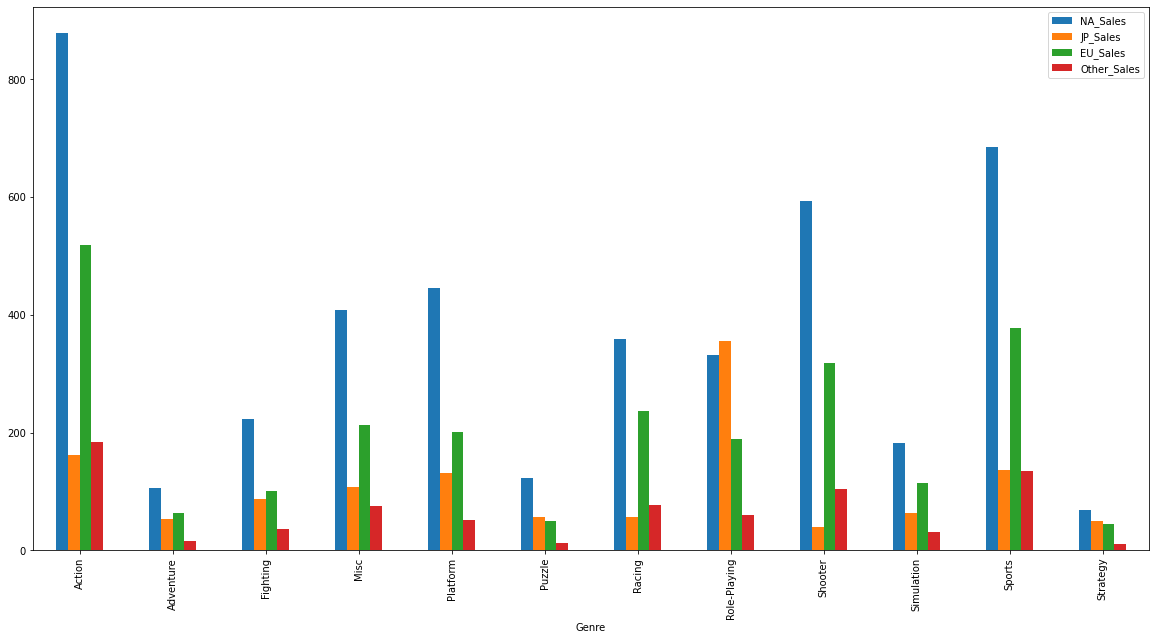

In [12]:
# 10.Group North American, Japan, European & Other region sales data as per Genre and plot it 
# (It should show highest of region according to game category , ex- NA_Sales is highest in Adventure category , 
# plot kind should be bar)

# Genre
group_region = df.groupby('Genre')[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].sum()
group_region.plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='Platform'>

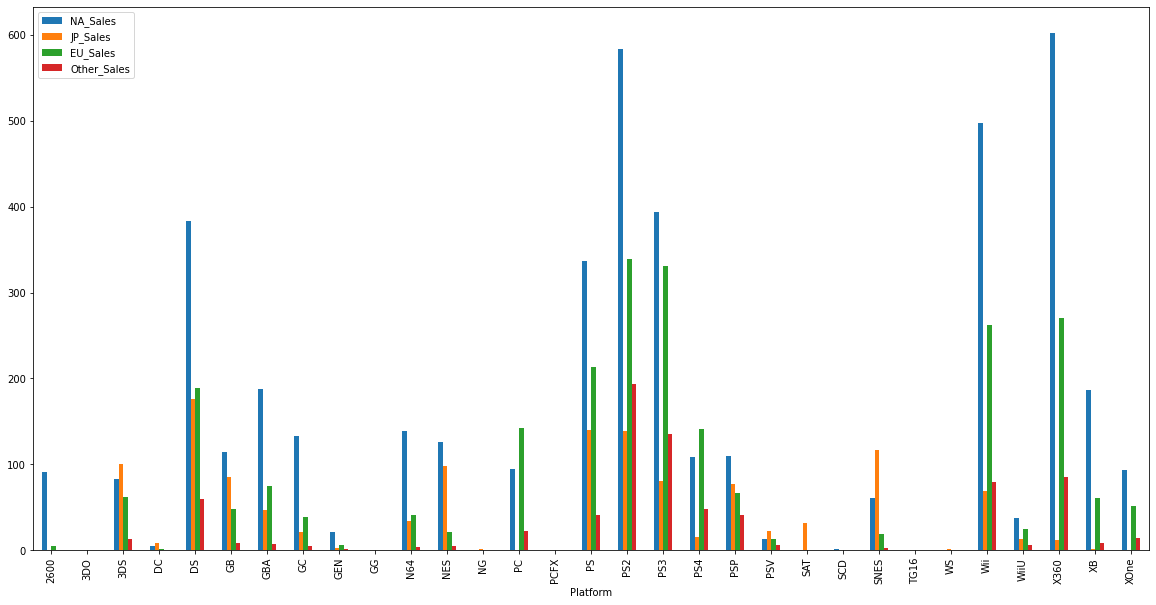

In [11]:
# 11.Group North American, Japan, European & Other region sales data as per Platform and plot it 
# (Should show sales as per "Platform genre" , plot kind should be bar )

# Platform
group_region = df.groupby('Platform')[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].sum()
group_region.plot(kind='bar',figsize=(20,10))


<AxesSubplot:title={'center':'Global_Sales'}, xlabel='Platform'>

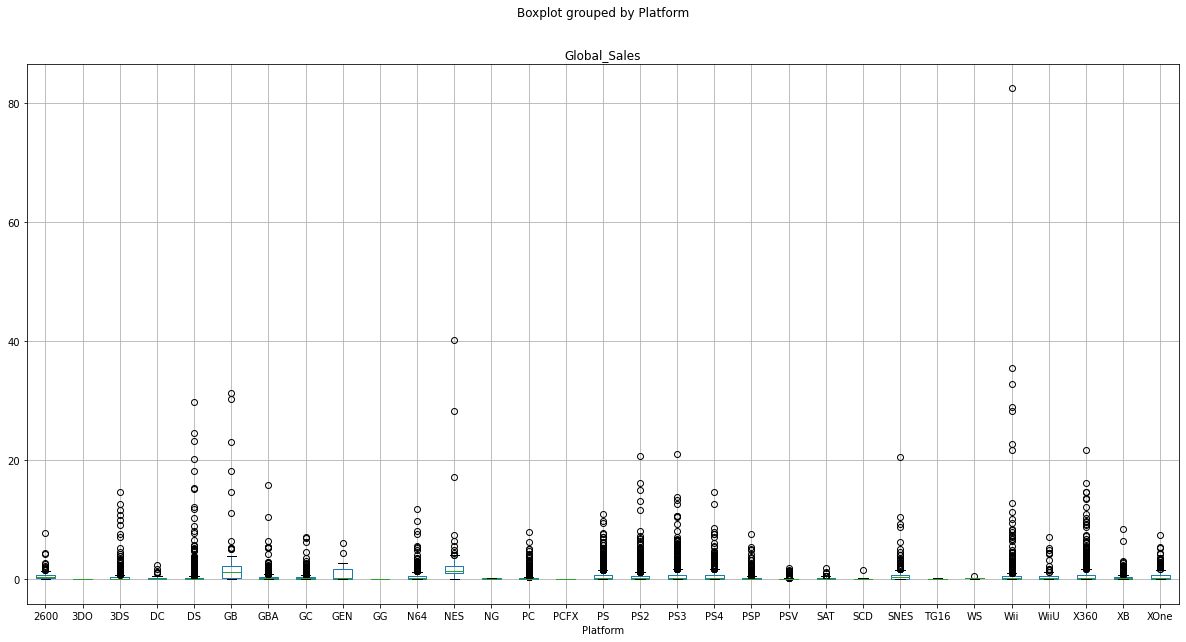

In [18]:
# 12.Plot the Sales in all regions as per Platform , you need to create a boxplot for that which will show the distribution of sales as per platform

# Sales data has many outliers, making the Boxplot difficult accurately graph the sales
df.boxplot(column='Global_Sales',by='Platform',figsize=(20,10))

<AxesSubplot:xlabel='Genre', ylabel='count'>

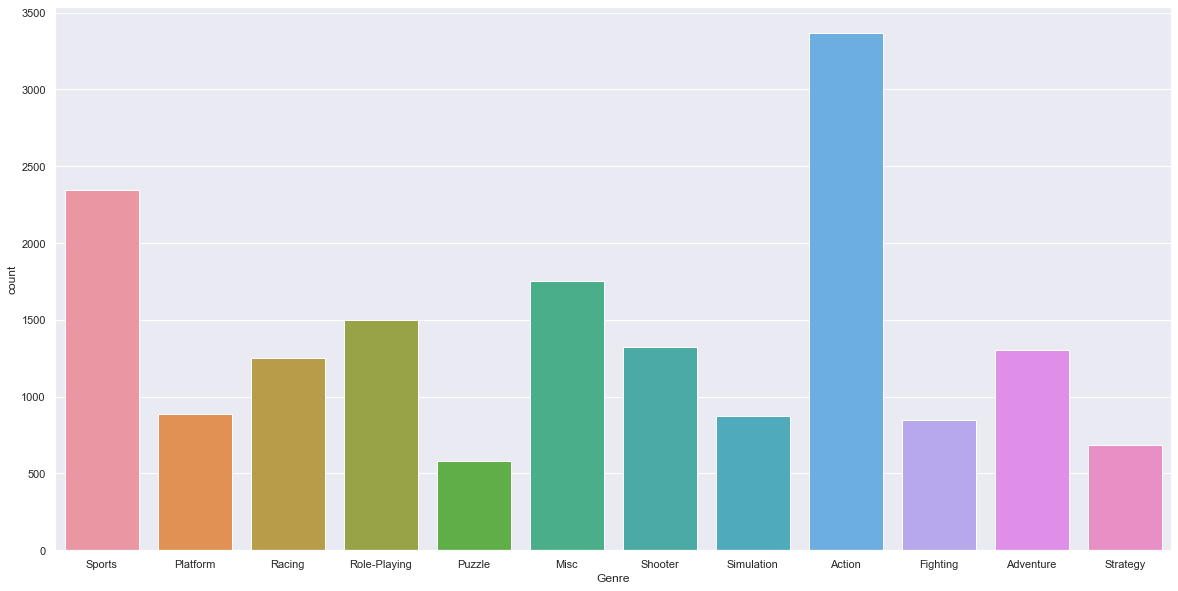

In [20]:
# 13.Find out which Genre games are sold in highest numbers (create a countplot of seaborn which could do that)

sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='Genre',data=df)

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

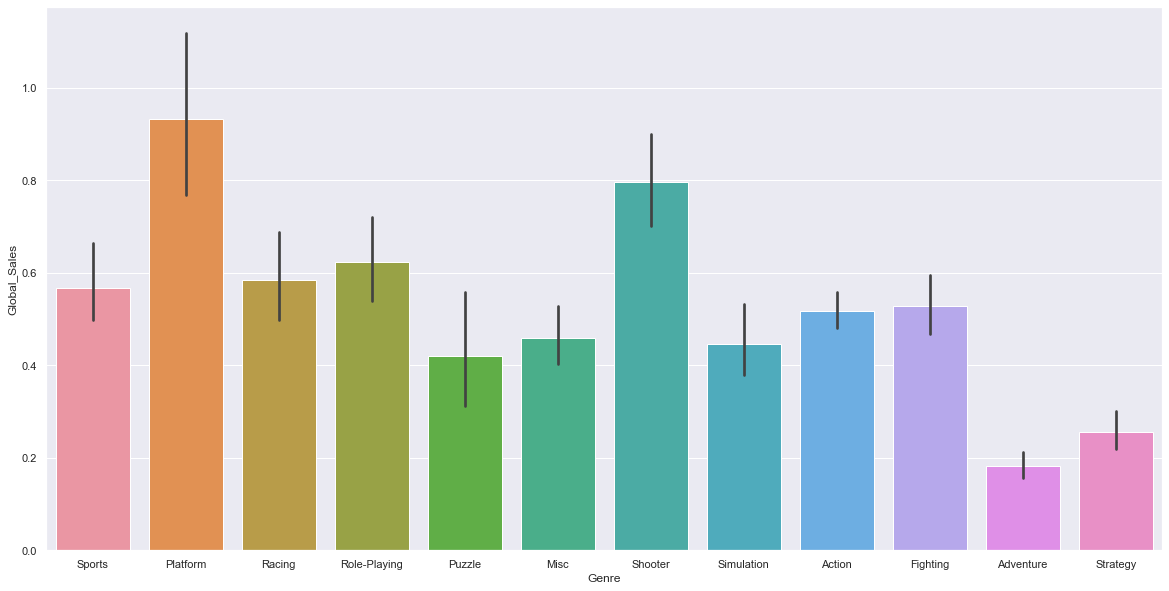

In [21]:
# 14.Try to find out global sales as per Genre ,(create a barplot of seaborn for that)

sns.barplot(x='Genre',y='Global_Sales',data=df)